# CNNs - Convolutional Neural Networks ..

Optional Resources

- Read about the [WaveNet](https://deepmind.com/blog/wavenet-generative-model-raw-audio/) model.

    - Why train an A.I. to talk, when you can train it to sing ;)? In April 2017, researchers used a variant of the WaveNet model to generate songs. The original paper and demo can be found [here](http://www.creativeai.net/posts/W2C3baXvf2yJSLbY6/a-neural-parametric-singing-synthesizer).


- Learn about CNNs [for text classification](http://www.wildml.com/2015/12/implementing-a-cnn-for-text-classification-in-tensorflow/).

    - You might like to sign up for the author's [Deep Learning Newsletter](https://www.getrevue.co/profile/wildml)!


- Read about Facebook's [novel CNN approach](https://code.facebook.com/posts/1978007565818999/a-novel-approach-to-neural-machine-translation/) for language translation that achieves state-of-the-art accuracy at nine times the speed of RNN models.


- Play [Atari games](https://deepmind.com/research/dqn/) with a CNN and reinforcement learning. You can [download](https://sites.google.com/a/deepmind.com/dqn/) the code that comes with this paper.

    - If you would like to play around with some beginner code (for deep reinforcement learning), you're encouraged to check out Andrej Karpathy's [post](http://karpathy.github.io/2016/05/31/rl/).


- Play [pictionary](https://quickdraw.withgoogle.com/#) with a CNN!

    - Also check out all of the other cool implementations on the [A.I. Experiments](https://aiexperiments.withgoogle.com/) website. Be sure not to miss [AutoDraw](https://www.autodraw.com/)!


- Read more about [AlphaGo](https://deepmind.com/research/alphago/).

    - Check out [this article](https://www.technologyreview.com/s/604273/finding-solace-in-defeat-by-artificial-intelligence/?set=604287), which asks the question: If mastering Go “requires human intuition,” what is it like to have a piece of one’s humanity challenged?


- Check out these really cool videos with drones that are powered by CNNs.

    - Here's an interview with a startup - [Intelligent Flying Machines (IFM)](https://www.youtube.com/watch?v=AMDiR61f86Y).
    - Outdoor autonomous navigation is typically accomplished through the use of the [global positioning system (GPS)](http://www.droneomega.com/gps-drone-navigation-works/), but here's a demo with a CNN-powered [autonomous drone](https://www.youtube.com/watch?v=wSFYOw4VIYY).


- If you're excited about using CNNs in self-driving cars, you're encouraged to check out:

    - our Self-Driving Car Engineer Nanodegree, where we classify signs in the [German Traffic Sign](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset) dataset in [this project](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project).
    - our [Machine Learning Engineer Nanodegree](https://www.udacity.com/course/machine-learning-engineer-nanodegree--nd009), where we classify house numbers from the [Street View](http://ufldl.stanford.edu/housenumbers/) House Numbers dataset in this [project](https://github.com/udacity/machine-learning/tree/master/projects/digit_recognition).
    - this [series of blog posts](https://pythonprogramming.net/game-frames-open-cv-python-plays-gta-v/) that details how to train a CNN in Python to produce a self-driving A.I. to play Grand Theft Auto V.


- Check out some additional applications not mentioned in the video.

    - Some of the world's most famous paintings have been [turned into 3D](http://www.businessinsider.com/3d-printed-works-of-art-for-the-blind-2016-1) for the visually impaired. Although the article does not mention how this was done, we note that it is possible to use a CNN to [predict depth](https://www.cs.nyu.edu/~deigen/depth/) from a single image.
    - Check out this [research](https://research.googleblog.com/2017/03/assisting-pathologists-in-detecting.html) that uses CNNs to localize breast cancer.
    - CNNs are used to [save endangered species](https://blogs.nvidia.com/blog/2016/11/04/saving-endangered-species/?adbsc=social_20170303_70517416)!
    - An app called [FaceApp](http://www.digitaltrends.com/photography/faceapp-neural-net-image-editing/) uses a CNN to make you smile in a picture or change genders.

As you follow along this lesson, you are encouraged to open the referenced Jupyter notebooks. We will present a solution to you, but please try creating your own deep learning models! Much of the value in this experience will come from playing around with the code in your own way.

In order to get up and running, please clone the materials from the GitHub repository by executing the following command in the terminal: git clone https://github.com/udacity/aind2-cnn.git. Follow the instructions in the repository to set up the Conda environment and install the necessary dependencies.

To open the notebook referenced in this video, navigate to the mnist-mlp/ folder and open mnist_mlp.ipynb.

Additional Note
The MNIST database is arguably the most famous database in the field of deep learning! Check out [this figure](https://www.kaggle.com/benhamner/d/benhamner/nips-papers/popular-datasets-over-time/code) that shows datasets referenced over time in [NIPS](https://nips.cc/) papers.

### Let's try to replicate the project here, note theory afterwards, we are basically trying to have baseline on how to achieve target from MLP (multi-layer perceptron) & build intution on how CNN can help take it to the next level ..

Optional Resources

Check out the [first research paper](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) to propose dropout as a technique for overfitting.
Here's the Keras [documentation](https://keras.io/layers/core/#flatten) for the Flatten layer.
If you'd like more information on activation functions, check out this [website](http://cs231n.github.io/neural-networks-1/#actfun).

### 1. Load MNIST Database

In [7]:
from keras.datasets import mnist

In [8]:
# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

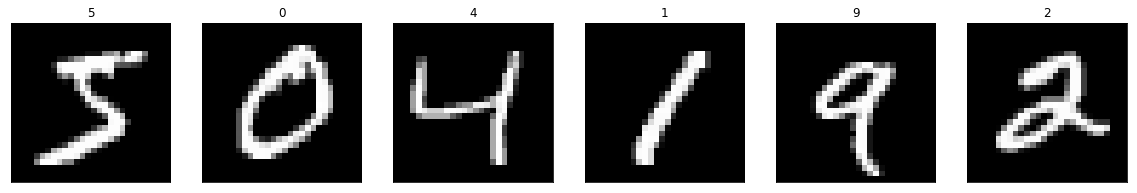

In [10]:
# plot first six training images
fig = plt.figure(figsize=(20,20))

for i in range(6):
    # Subplot 1 row, 6 cols, i+1 plot at  the specific index
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

In [11]:
print "Shape Size", X_train[0].shape

# So each shape is 28 x 28, which means each letter is represented 
# as 28 rows and 28 columns values of image data shown above, combining this
# will print hand-written image in grayscale
print X_train[0]

Shape Size (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 25

## Let's visually see it 

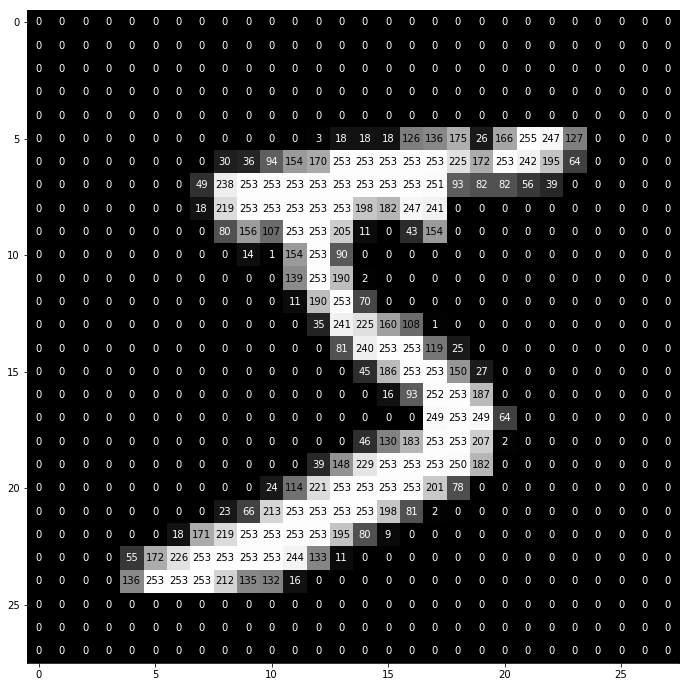

In [12]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            #print (str(round(img[x][y],2)))
            ax.annotate(str(img[x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [13]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### Visualize again after normalization

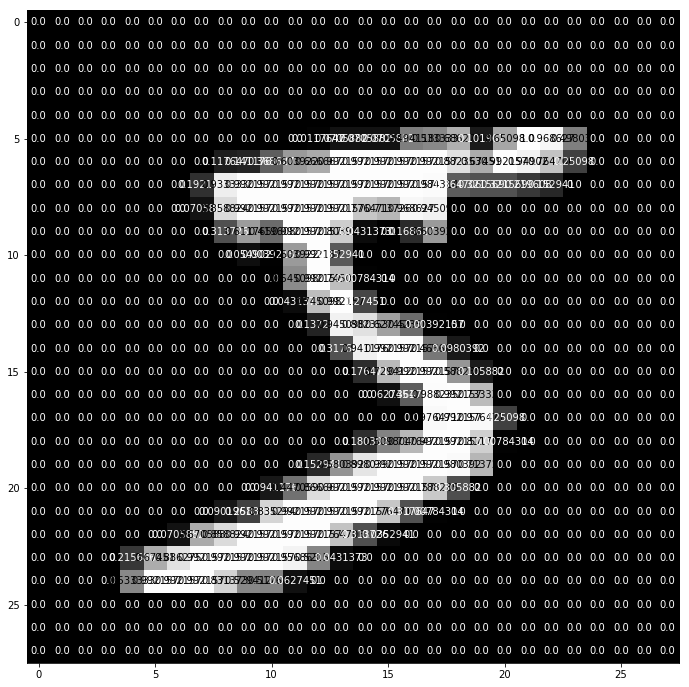

In [14]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### Notice since these values are converted to floats, they sort of not show up clearly

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [10]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### 6. Define the Model Architecture

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [12]:
# define the model
model = Sequential()

# Since MLP can only take Vectors, we have to first flatten the inputs 
# Flatten image from (28x28) to (1 x 784) 
# For Input Shape # of Channels, Features go first 
# here we passed (28,) to input_shape whch translates to 
# .... one row with 28x28 columns (channels/features)
model.add(Flatten(input_shape=X_train.shape[1:]))

# Add Dense Layer (Nothing NN layer) with Relu Activation
# ReLu is like switch it mutes all zeros and keep positive values
# This helps with vanishing gradient problems 
model.add(Dense(512, activation='relu'))

# Add Dropout to avoid bias of heavy weighted nodes, and in essence
# allow every node to have fair chance in the defining outcome.
# This in essence to counter over-fitting problem..
model.add(Dropout(0.2))

## Another layer of NN with ReLu
model.add(Dense(512, activation='relu'))

## Another layer of Dropout
model.add(Dropout(0.2))

# Add final layer with size as 10 (i.e. number of possible outcomes)
# with softmax to have probabilities for each outcome
model.add(Dense(10, activation='softmax'))

# print summary the model to see shpes and params and also arch
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


#### Alternatively, We can also print model architecture as below .. 

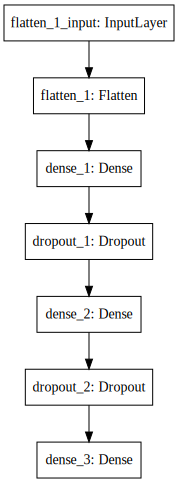

In [21]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

### 7. Compile the Model

In [13]:
# compile the model
# Loss is categorical_crossentropy as it is multinomial (not binomial) or 
# in other words we have 10 classes ..
# Optimizer 'rmsprop' ( Gradient Descent technique )
# Metrics is equivauent to loss function just not applied back to model
# and it helps measure accuracy/performace of the model,
# we can define custom metrics function and pass here ..
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['categorical_accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training) - Our chances without training are 1 in 10 .. which means about 10%, below run proves that, we are about 11% ..

In [14]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)

print "Score Raw (Loss Value & Metrics Value ) - ", score
accuracy = 100*score[1]

# print test accuracy
print('\n Test accuracy: %.4f%%' % accuracy)

Score Raw (Loss Value & Metrics Value ) -  [2.3342530685424805, 0.1009]

 Test accuracy: 10.0900%


### 9. Train the Model

In [120]:
from keras.callbacks import ModelCheckpoint   

# Create a checkpoint to store only the best score model..
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)

# fit (train) the model
hist = model.fit(X_train, y_train, batch_size=128, epochs=50,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 105us/step - loss: 0.0121 - categorical_accuracy: 0.9965 - val_loss: 0.1374 - val_categorical_accuracy: 0.9810

Epoch 00001: val_loss improved from inf to 0.13740, saving model to mnist.model.best.hdf5
Epoch 2/50
48000/48000 [==============================] - 5s 103us/step - loss: 0.0147 - categorical_accuracy: 0.9965 - val_loss: 0.1406 - val_categorical_accuracy: 0.9810

Epoch 00002: val_loss did not improve
Epoch 3/50
48000/48000 [==============================] - 5s 101us/step - loss: 0.0140 - categorical_accuracy: 0.9962 - val_loss: 0.1341 - val_categorical_accuracy: 0.9822

Epoch 00003: val_loss improved from 0.13740 to 0.13408, saving model to mnist.model.best.hdf5
Epoch 4/50
48000/48000 [==============================] - 5s 105us/step - loss: 0.0128 - categorical_accuracy: 0.9965 - val_loss: 0.1422 - val_categorical_accuracy: 0.9820

Epoch 00004: val_loss did not improv

48000/48000 [==============================] - 5s 103us/step - loss: 0.0083 - categorical_accuracy: 0.9984 - val_loss: 0.1768 - val_categorical_accuracy: 0.9821

Epoch 00039: val_loss did not improve
Epoch 40/50
48000/48000 [==============================] - 5s 104us/step - loss: 0.0096 - categorical_accuracy: 0.9982 - val_loss: 0.1818 - val_categorical_accuracy: 0.9811

Epoch 00040: val_loss did not improve
Epoch 41/50
48000/48000 [==============================] - 5s 111us/step - loss: 0.0068 - categorical_accuracy: 0.9984 - val_loss: 0.1731 - val_categorical_accuracy: 0.9816

Epoch 00041: val_loss did not improve
Epoch 42/50
48000/48000 [==============================] - 5s 107us/step - loss: 0.0066 - categorical_accuracy: 0.9986 - val_loss: 0.1688 - val_categorical_accuracy: 0.9829

Epoch 00042: val_loss did not improve
Epoch 43/50
48000/48000 [==============================] - 5s 110us/step - loss: 0.0088 - categorical_accuracy: 0.9982 - val_loss: 0.1822 - val_categorical_accuracy

### 9.1 Early Stopping Technique to not run all epochs with model has stopped gaining any performance (can be measured in various different ways)

In [16]:
from keras.callbacks import ModelCheckpoint 
from keras.callbacks import EarlyStopping 

# Create a checkpoint to store only the best score model..
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)

# Create callback fo Early Stopping, in this case
# it will be aggresive, auto stop as soon as model does not
# decrease validation loss, but one can play with other attributes
# to control this behavior as after 5 epochs of no improvement as example.
earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

# fit (train) the model
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer, earlyStopping],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 106us/step - loss: 0.0248 - categorical_accuracy: 0.9927 - val_loss: 0.1057 - val_categorical_accuracy: 0.9777

Epoch 00001: val_loss improved from inf to 0.10574, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 5s 104us/step - loss: 0.0211 - categorical_accuracy: 0.9941 - val_loss: 0.1286 - val_categorical_accuracy: 0.9763

Epoch 00002: val_loss did not improve


### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [17]:
# load just the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [18]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.0100%


** Optional Resources **

* If you'd like more details about fully connected layers in Keras, check out the [documentation](https://keras.io/layers/core/) for the Dense layer. You can change the way the weights are initialized through supplying values for the kernel_initializer and bias_initializer parameters. Note that the default values are 'glorot_uniform', and 'zeros', respectively. You can read more about how each of these initializers work in the corresponding Keras [documentation](https://keras.io/initializers/).

* There are many different [loss functions](https://keras.io/losses/) in Keras. For this lesson, we will only use categorical_crossentropy.

* Check out the list of [available optimizers](https://keras.io/optimizers/) in Keras. The optimizer is specified when you compile the model (in Step 7 of the notebook).

        'sgd' : SGD
        'rmsprop' : RMSprop
        'adagrad' : Adagrad
        'adadelta' : Adadelta
        'adam' : Adam
        'adamax' : Adamax
        'nadam' : Nadam
        'tfoptimizer' : TFOptimizer
        
* There are many callbacks (such as ModelCheckpoint) that you can use to monitor your model during the training process. If you'd like, check out the [details](https://keras.io/callbacks/#modelcheckpoint) here. You're encouraged to begin with learning more about the EarlyStopping [callback](https://keras.io/callbacks/). If you'd like to see another code example of ModelCheckpoint, check out [this blog](http://machinelearningmastery.com/check-point-deep-learning-models-keras/).

### 12.  Let's plot how model has performed just to get visual sense of the patters

In [19]:
# hist object contains run information of all epochs, 
# let's use that to plot

hist.history

{'categorical_accuracy': [0.9926666666666667, 0.99406249999999996],
 'loss': [0.024799657831705797, 0.021107874988626766],
 'val_categorical_accuracy': [0.97774999984105426, 0.97633333349227902],
 'val_loss': [0.10573808587943979, 0.12857833759397425]}

In [23]:
## Since we have training and validation accuracy and loss values
## we can plot these to see how they trend, since last run was cropped to 
## only 3 epochs, let's rerun the Step 15, to have 10 runs ..

# list all data in history
print(hist.history.keys())

['val_categorical_accuracy', 'loss', 'categorical_accuracy', 'val_loss']


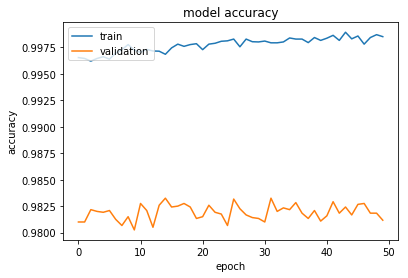

In [121]:
# summarize history for accuracy
plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### So we see above that at some point test accuracy start to drop, in essence there is no point training the model after roughly epoch 5th ..

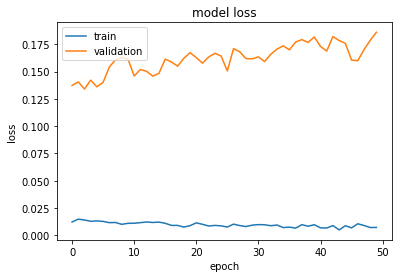

In [122]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Similarly, we see here that loss stops to drop after roughly epoch 5th and starts to behave like a straight line, at this point ideally we should stop training further ..

#### Also since training loss is more (not less) than validation we are not hitting over-fitting scenario.

### 13. As last step let's predict using our trained model to see how it performs and also get good sense of how each prediction outcome look..

In [30]:
## We see that first image is hod-encoded 7 .
y_test[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

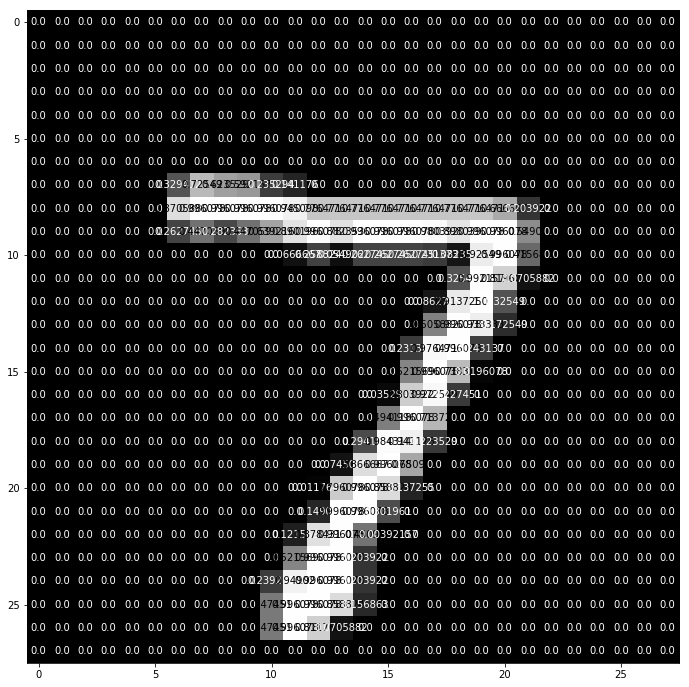

In [31]:
## Let's see the data visually before we predict

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_test[0], ax)

In [59]:
## let's see what our model predict 

## Before we pass the input, it has 3 dimensions 
## (num records, shape[0], shape[1])
## ( , 28, 28) , we know we are just passing one sample
## so it should be (1, 28, 28), requrining reshape, as else
## X_test[0] strips first dimension required by model
## we have to normalize te training sample 

X_sample = (X_test[0]).reshape(1,28,28)


print "X_sample Shape", X_sample.shape

X_sample Shape (1, 28, 28)


In [114]:
## Predictions are returned
predictions = model.predict(X_sample)

In [115]:
# Let's print and see softmax outcomes, since the values
# are exponents they are not easily readable, let's 
# round them
predictions

array([[  8.18031221e-30,   3.73779331e-25,   3.19659666e-22,
          6.52691459e-23,   4.70335815e-34,   1.58070580e-28,
          0.00000000e+00,   1.00000000e+00,   2.69224664e-29,
          8.90924805e-19]], dtype=float32)

In [116]:
## Simple logic for rounding and while we do this let's track boolen match
rounded = []
bool_outcome = []

for x in predictions:
    i = 0
    
    for y in x:
        rounded.append(round(y))
        bool_outcome.append(round(y) == y_test[0][i])
        i += 1
        
print rounded
print bool_outcome

## We can see that prediction match actual 

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[True, True, True, True, True, True, True, True, True, True]


In [101]:
## Alternatively, we can simply do argmax to see max probability index
## which is nothing but 7
print(np.argmax(predictions, axis=1))

[7]


In [117]:
## We can also see boolean match once we have rounded values,
## though this was done above, seperate it for easy understanding ..
y_test[0] == rounded

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

# We got fairly good accuracy, but key here is that we have very cleaned and refined (28, 28) training data to work on and for such scenarios MLP does fairly good job. However, if we do not have clean data like the real world, where inputs are not uniformed and cleaned MLP may not yield very good result.

# To draw the intution, what we fed to MLP was transformed Vector (1, 784) of 28,28 images. So MLP does not know any correlations of multi-dimensions, this is where CNN outshine as it can infer data in multi-dimesional space, which means it not just can see pixels sequentally but it can understand neighboring pixels and relevance of those in contrast to draw better outcomes. 

# This is where if we see below optional resource and accuracy landscape across various algorithms, CNN based models draw better accuracy and least loss ..

Optional Resource

* Check out the performance of other [classifiers](http://yann.lecun.com/exdb/mnist/).

# Except CNN take multi-dimensional data, strtucturally it is very similar to MLP, as in it has many layers, though layer types in CNN are tad different and we will study them ahead ..

![CNN](images/cnn1.png)

Deeplearning/AI is [not well-undestood]()https://www.technologyreview.com/s/604087/the-dark-secret-at-the-heart-of-ai/) .. Good article to read why ..

### Hyper-parameter tuning is very challenging, here are some neat techniques and scikit utilities to help ease this job ..

[How to Grid Search Hyperparameters for Deep Learning Models in Python With Keras](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/)

## Last link above is so intruguing, fine tuning hyper parameters is an art, let's apply this knowledge of using GridSearchCV before we go further on on CNNs

In [22]:
# To use scikit learn we must define a method which returns Keras sequential mode.

def create_model(optimizer='rmsprop', learn_rate=0.01, momentum=0,init_mode='uniform', activation='relu', dropout_rate=0.0, weight_constraint=0, neurons=1 ):
    # define the model
    model = Sequential()

    # Since MLP can only take Vectors, we have to first flatten the inputs 
    # Flatten image from (28x28) to (1 x 784) 
    # For Input Shape # of Channels, Features go first 
    # here we passed (28,) to input_shape whch translates to 
    # .... one row with 28x28 columns (channels/features)
    model.add(Flatten(input_shape=X_train.shape[1:]))

    # Add Dense Layer (Nothing NN layer) with Relu Activation
    # ReLu is like switch it mutes all zeros and keep positive values
    # This helps with vanishing gradient problems 
    model.add(Dense(512, activation='relu'))

    # Add Dropout to avoid bias of heavy weighted nodes, and in essence
    # allow every node to have fair chance in the defining outcome.
    # This in essence to counter over-fitting problem..
    model.add(Dropout(0.2))

    ## Another layer of NN with ReLu
    model.add(Dense(512, activation='relu'))

    ## Another layer of Dropout
    model.add(Dropout(0.2))

    # Add final layer with size as 10 (i.e. number of possible outcomes)
    # with softmax to have probabilities for each outcome
    model.add(Dense(10, activation='softmax'))

    # print summary the model to see shpes and params and also arch
    model.summary()
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
    
    return model

In [23]:
from keras.wrappers.scikit_learn import KerasClassifier 

#Example below on how to create, we will revisit this later for every use case
model = KerasClassifier(build_fn=create_model)

http://keras.io/scikit-learn-api/

**How to Use Grid Search in scikit-learn**

Grid search is a model hyperparameter optimization technique.

In scikit-learn this technique is provided in the GridSearchCV class.

When constructing this class you must provide a dictionary of hyperparameters to evaluate in the param_grid argument. This is a map of the model parameter name and an array of values to try.

By default, accuracy is the score that is optimized, but other scores can be specified in the score argument of the GridSearchCV constructor.

By default, the grid search will only use one thread. By setting the n_jobs argument in the GridSearchCV constructor to -1, the process will use all cores on your machine. Depending on your Keras backend, this may interfere with the main neural network training process.

The GridSearchCV process will then construct and evaluate one model for each combination of parameters. Cross validation is used to evaluate each individual model and the default of 3-fold cross validation is used, although this can be overridden by specifying the cv argument to the GridSearchCV constructor.

Below is an example of defining a simple grid search:


    param_grid = dict(epochs=[10,20,30])
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
    grid_result = grid.fit(X, Y)

Once completed, you can access the outcome of the grid search in the result object returned from grid.fit(). The best_score_ member provides access to the best score observed during the optimization procedure and the best_params_ describes the combination of parameters that achieved the best results.

You can learn more about the [GridSearchCV class in the scikit-learn API documentation](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV).

## Tune Batch Size and Number of Epochs

The batch size in iterative gradient descent is the number of patterns shown to the network before the weights are updated. It is also an optimization in the training of the network, defining how many patterns to read at a time and keep in memory.

The number of epochs is the number of times that the entire training dataset is shown to the network during training. Some networks are sensitive to the batch size, such as LSTM recurrent neural networks and Convolutional Neural Networks.

Here we will evaluate a suite of different mini batch sizes from 10 to 100 in steps of 20.

In [24]:
from sklearn.model_selection import GridSearchCV

# Since we have defined our model already, let's start ahead

model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters for experimentation
#batch_size = [10, 20, 40, 60, 80, 100, 128]
# Trimming it down to save time
batch_size = [10, 128]
epochs = [10, 20]
param_grid = dict(batch_size=batch_size, epochs=epochs)

#Make n_jobs=-1 to use all vailable cores
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
____

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
____

** How to Tune the Training Optimization Algorithm **

Keras offers a suite of different state-of-the-art optimization algorithms.

In this example, we tune the optimization algorithm used to train the network, each with default parameters.

This is an odd example, because often you will choose one approach a priori and instead focus on tuning its parameters on your problem (e.g. see the next example).

Here we will evaluate the suite of optimization [algorithms supported by the Keras API](http://keras.io/optimizers/).

In [25]:
# Let's use less data as it is taking awfully long time on CPU

X = X_train[0:1000]
Y = y_train[0:1000]

In [27]:
# To use scikit learn we must define a method which returns Keras sequential mode.

def create_model(optimizer='rmsprop', learn_rate=0.01, momentum=0,init_mode='uniform', activation='relu', dropout_rate=0.0, weight_constraint=0, neurons=1 ):
    # define the model
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:]))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    #model.summary()
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy'])
    
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=128, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.854000 using {'optimizer': 'Adamax'}
0.431000 (0.034179) with: {'optimizer': 'SGD'}
0.827000 (0.018596) with: {'optimizer': 'RMSprop'}
0.842000 (0.013488) with: {'optimizer': 'Adagrad'}
0.815000 (0.026429) with: {'optimizer': 'Adadelta'}
0.835000 (0.009001) with: {'optimizer': 'Adam'}
0.854000 (0.017372) with: {'optimizer': 'Adamax'}
0.832000 (0.039607) with: {'optimizer': 'Nadam'}


** How to Tune Learning Rate, Momentum, Epsilon, Deacy basically (Optimzer Params)**

It is common to pre-select an optimization algorithm to train your network and tune its parameters.

By far the most common optimization algorithm is plain old Stochastic Gradient Descent (SGD) because it is so well understood. In this example though, we will look at optimizing the Adamax as returned as best choice earlier, learning rate and momentum parameters.

Learning rate controls how much to update the weight at the end of each batch and the momentum controls how much to let the previous update influence the current weight update.

We will try a suite of small standard learning rates and a momentum values from 0.2 to 0.8 in steps of 0.2, as well as 0.9 (because it can be a popular value in practice).

Generally, it is a good idea to also include the number of epochs in an optimization like this as there is a dependency between the amount of learning per batch (learning rate), the number of updates per epoch (batch size) and the number of epochs.



In [ ]:
from keras.optimizers import Adamax
def create_model(optimizer='rmsprop', learn_rate=0.01, momentum=0,init_mode='uniform', activation='relu', dropout_rate=0.0, weight_constraint=0, neurons=1 ):
    # define the model
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:]))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    #model.summary()
    optimizer = Adamax(lr=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy'])
    
    return model


# create model
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=128, verbose=0)

# define the grid search parameters
# learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
learn_rate = [0.01, 0.1, 0.2]
momentum = [0.0, 0.2]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

**How to Tune Network Weight Initialization**

Neural network weight initialization used to be simple: use small random values.

Now there is a suite of different techniques to choose from. [Keras provides a laundry list](http://keras.io/initializations/).

In this example, we will look at tuning the selection of network weight initialization by evaluating all of the available techniques.

We will use the same weight initialization method on each layer. Ideally, it may be better to use different weight initialization schemes according to the activation function used on each layer. In the example below we use rectifier for the hidden layer. We use sigmoid for the output layer because the predictions are binary.

In [ ]:
from keras.optimizers import Adamax
def create_model(optimizer='rmsprop', learn_rate=0.1, momentum=0,init_mode='uniform', activation='relu', dropout_rate=0.0, weight_constraint=0, neurons=512 ):
    # define the model
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:]))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    #model.summary()
    optimizer = Adamax(lr=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy'])
    
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=128, verbose=0)

# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

**How to Tune the Neuron Activation Function**

The activation function controls the non-linearity of individual neurons and when to fire.

Generally, the rectifier activation function is the most popular, but it used to be the sigmoid and the tanh functions and these functions may still be more suitable for different problems.

In this example, we will evaluate the suite of [different activation functions](http://keras.io/activations/) available in Keras. We will only use these functions in the hidden layer, as we require a sigmoid activation function in the output for the binary classification problem.

Generally, it is a good idea to prepare data to the range of the different transfer functions, which we will not do in this case.

In [ ]:
from keras.optimizers import Adamax
def create_model(optimizer='rmsprop', learn_rate=0.1, momentum=0,init_mode='uniform', activation='relu', dropout_rate=0.0, weight_constraint=0, neurons=512 ):
    # define the model
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:]))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(0.2))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    #model.summary()
    optimizer = Adamax(lr=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy'])
    
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=128, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

** How to Tune Dropout Regularization **

In this example, we will look at tuning the dropout rate for regularization in an effort to limit overfitting and improve the model’s ability to generalize.

To get good results, dropout is best combined with a weight constraint such as the max norm constraint.

For more on using dropout in deep learning models with Keras see the post:

* [Dropout Regularization in Deep Learning Models With Keras](http://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)

This involves fitting both the dropout percentage and the weight constraint. We will try dropout percentages between 0.0 and 0.9 (1.0 does not make sense) and maxnorm weight constraint values between 0 and 5.

In [ ]:
from keras.optimizers import Adamax
def create_model(optimizer='rmsprop', learn_rate=0.1, momentum=0,init_mode='uniform', activation='relu', dropout_rate=0.2, weight_constraint=0, neurons=512 ):
    # define the model
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:]))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))

    #model.summary()
    optimizer = Adamax(lr=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy'])
    
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=128, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

** How to Tune the Number of Neurons in the Hidden Layer **

The number of neurons in a layer is an important parameter to tune. Generally the number of neurons in a layer controls the representational capacity of the network, at least at that point in the topology.

Also, generally, a large enough single layer network can approximate any other neural network, at least in theory.

In this example, we will look at tuning the number of neurons in a single hidden layer. We will try values from 1 to 30 in steps of 5.

A larger network requires more training and at least the batch size and number of epochs should ideally be optimized with the number of neurons.

In [ ]:
from keras.optimizers import Adamax
def create_model(optimizer='rmsprop', learn_rate=0.1, momentum=0,init_mode='uniform', activation='relu', dropout_rate=0.2, weight_constraint=0, neurons=512 ):
    # define the model
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:]))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))

    #model.summary()
    optimizer = Adamax(lr=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy'])
    
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 512]
param_grid = dict(neurons=neurons)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


### Tips for Hyperparameter Optimization

This section lists some handy tips to consider when tuning hyperparameters of your neural network.

* k-fold Cross Validation. You can see that the results from the examples in this post show some variance. A default cross-validation of 3 was used, but perhaps k=5 or k=10 would be more stable. Carefully choose your cross validation configuration to ensure your results are stable.

* Review the Whole Grid. Do not just focus on the best result, review the whole grid of results and look for trends to support configuration decisions.

* Parallelize. Use all your cores if you can, neural networks are slow to train and we often want to try a lot of different parameters. Consider spinning up a lot of AWS instances.

* Use a Sample of Your Dataset. Because networks are slow to train, try training them on a smaller sample of your training dataset, just to get an idea of general directions of parameters rather than optimal configurations.

* Start with Coarse Grids. Start with coarse-grained grids and zoom into finer grained grids once you can narrow the scope.

* Do not Transfer Results. Results are generally problem specific. Try to avoid favorite configurations on each new problem that you see. It is unlikely that optimal results you discover on one problem will transfer to your next project. Instead look for broader trends like number of layers or relationships between parameters.

* Reproducibility is a Problem. Although we set the seed for the random number generator in NumPy, the results are not 100% reproducible. There is more to reproducibility when grid searching wrapped Keras models than is presented in this post.

# CNNs

![CNN](images/cnn2.png)

Let's look at MLP again, do we have to connect every input to every neuron, possibly not .. 

![CNN](images/cnn3.png)

How about if we group them and each group only talk to their neuron, in a way it is now foucsed on certian inference and in combimation of all groups(neurons outcomes) infer overall outcomes.

![CNN](images/cnn4.png)

These ideas are what are drivers for defining CNN, and if we further increse the complexity i.e. add more layers network can learn more richer content ..

![CNN](images/cnn5.png)

**WEIGHT SHARING**

It will proven to be useful if nodes within certain group of collection share common weights, the intution is that different region in the images can share the same information, and with weight sharing once system learn one part of image it can simply use that learning to identify similar objects in other part of images .. example in the image below it does not matter if cat is in the left of the picture, top, or bottom ..weight sharing will help make this identificatio a lot easier than network learn each of the image section individually.

![CNN](images/cnn6.png)

![CNN](images/cnn7.png)
![CNN](images/cnn8.png)



### So let's talk about Convolutional Layers

In last segment, we understood ideas of breaking down images into smaller segments, grouping them with shared weights for computaionally better performance & also richer inference.

In this segment, let's see how to apply this ..

First, we define a window of certain size - this window will help break down input image to smaller sections ..

![CNN](images/cnn9.png)

Then we slide this window vertically and horizintally over input image like shown below ..

![CNN](images/cnn10.png)

This window defines collection of pixels from Input Image, whcih we connect to the single hidden node ..

![CNN](images/cnn11.png)
![CNN](images/cnn12.png)


We call this hidden layer a ** Convolutional Layer **
![CNN](images/cnn13.png)

So let's look deeper on how the Convolutional Layer node values are computed, it is in past we have seen, Inputs sum over with weights (labeled on dotted lines) + Bias fed to activation fuction as shown below on how the value zero is derived.

Also note that weights as always will be intialized and over time optimize ..

![CNN](images/cnn14.png)

It will easier if we represent weights as Matrix, note this is a stage we can define our window with weights as **FILTER**. In this case our filter is of size 3x3.

![CNN](images/cnn15.png)

Let's redraw the computational view again, for easy readibility .. 

![CNN](images/cnn16.png)


Now, let's closely study the below section of image, we see that large values in the filter perfectly corrosponds to this section of the image .. converse is also true, smallest values in the filter corresponding to smallest values in the image.

![CNN](images/cnn17.png)

Above is also true for below section of the image .. !!

![CNN](images/cnn18.png)

This shows a pattern in image and also proves that previous section and this new section both are indenticle!! And if we notice, score for these 2 sections is also same.


If we see the filter, it shows the same pattern, larger values depict ligher color and smaller values depict darker color. And it is also diagnonal pattern as seen above.

In fact, when we use CNN, we will often visualize the filters & this visualization will tell us what pattern this network is designed to detect.
  
![CNN](images/cnn19.png)

So far our model has only one filter & and this will tell us about one pattern whether it is detetcted or not. If we want to discover more patterns, we will have to add more filters and intution of why we need to do this below .. 


Let's study image of car and try to detetct the same, we have four filters as show below, each of these are 4x4 ..

![CNN](images/cnn20.png)

Each of these filters will convolve across heigth and width of the image to produce an entrie collection of nodes in the Conv Layer.

![CNN](images/cnn21.png)


In parctice, each of these four collections are either referred as 
** Feature Maps or Activation Maps **

If we now visualize these feature maps, we will start to see what these feature maps are discovering , and if we see patterns, first two filters are discovering verticle edges and last 2 filters are discovering horizontal edges. Lighter Values (lines) are depiction of some pattern indetified in the image ..

![CNN](images/cnn22.png)

At this stage, can we infer the patterns detetcted by filters can have some relation with input image, if we see below, we see that the right line is nothing but edge of the car on the right side .. 

![CNN](images/cnn23.png)

If we see, edges in images is a line of lighter pixels next to the line of draker pixels. Below image will have many sections identified by our filter, and in practice, such CNNs are very important, we will study about their relevance later.

![CNN](images/cnn24.png)

### let's see this in action .. 

### Import Image

/Users/anmehra/Desktop/Anconda_Py2.7/anaconda/envs/DAND/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


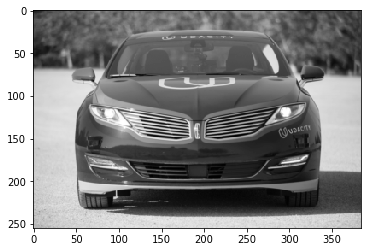

In [18]:
import cv2
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = '../aind2-cnn/conv-visualization/images/udacity_sdc.png'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
# resize to smaller
small_img = scipy.misc.imresize(gray_img, 0.3)

# rescale entries to lie in [0,1]
small_img = small_img.astype("float32")/255

# plot image
plt.imshow(small_img, cmap='gray')
plt.show()

### 2. Specify the Filters

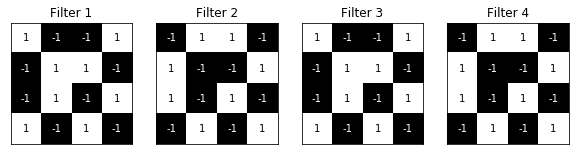

In [21]:
import numpy as np

# TODO: Feel free to modify the numbers here, to try out another filter!
# Please don't change the size of the array ~ :D
#filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
filter_vals = np.array([[1, -1, -1, 1], [-1, 1, 1, -1], [-1, 1, -1, 1], [1, -1, 1, -1]])

### do not modify the code below this line ###

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = [filter_1, filter_2, filter_3, filter_4]

# visualize all filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

### 3. Visualize the Activation Maps for Each Filter

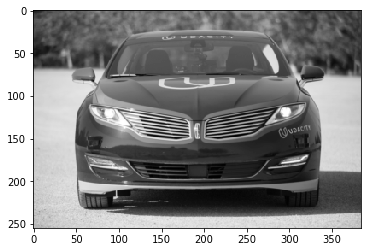

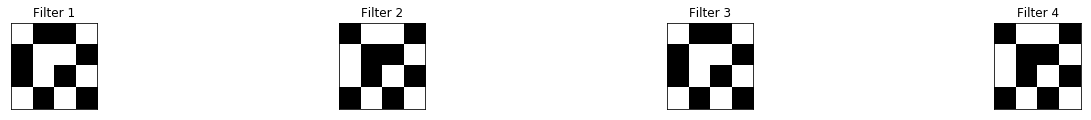

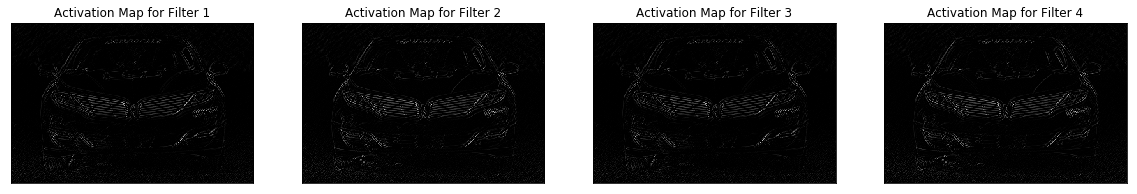

In [22]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
import matplotlib.cm as cm

# plot image
plt.imshow(small_img, cmap='gray')

# define a neural network with a single convolutional layer with one filter
model = Sequential()
model.add(Convolution2D(1, (4, 4), activation='relu', input_shape=(small_img.shape[0], small_img.shape[1], 1)))

# apply convolutional filter and return output
def apply_filter(img, index, filter_list, ax):
    # set the weights of the filter in the convolutional layer to filter_list[i]
    model.layers[0].set_weights([np.reshape(filter_list[i], (4,4,1,1)), np.array([0])])
    # plot the corresponding activation map
    ax.imshow(np.squeeze(model.predict(np.reshape(img, (1, img.shape[0], img.shape[1], 1)))), cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

# visualize all activation maps
fig = plt.figure(figsize=(20, 20))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    apply_filter(small_img, i, filters, ax)
    ax.set_title('Activation Map for Filter %s' % str(i+1))

# Pretty Cool, real life demo of the how Filters action over image .. 

http://setosa.io/ev/image-kernels/

## So we saw how CNNs can be insanely impactful discovering patterns in Grayscale Images which are nothing but 2D Array, what about Color Images ??

Color Images are very similar but are 3D in nature, where 3rd dimensons aka as depth is nothing but RGB (Red Green Blue) for RGB Image space ..

![CNN](images/cnn25.png)

So how we apply filter to color images? It is very similar to 2D, filter horizantally & vertically but subtle difference is that now filter itself is 3D as showb below ..

![CNN](images/cnn26.png)

And the values are computed as we have seen below, however notice that below metioned computation translates to one node output ..

![CNN](images/cnn27.png)

Similarly, multiple filters can be applied .. 

![CNN](images/cnn28.png)

And here things gets interesting, we can picture below as one stack of Convolutional Layer
and this can be stacked as input to another layer to study feature with in feature & this whole process can be stacked to n number of layers ..

![CNN](images/cnn29.png)
![CNN](images/cnn30.png)

## Refresher: 

### Dense Layers are fully connected, i.e. node are connected to every other node in the layer.

### Convolution Layer are NOT fully connected, i.e. they connect to only a subset of previous layer nodes + Convolutional layers have concept of paramemter sharing ..


However, inference and overall conceptual ideation are similar, example weights initialization in dense are randomly generated, similarly filter initialization in Conv are also randomly generated .. Same goes for ideation of defining loss function / categorical_loss function, backpropagtion etc 

## So what are the hyper-parameters which can be tuned .. 

* **Number of Filters** - This is directionally proportional to number of nodes in hidden layer.

* **Filter Size** - This impact the size of the coverage or detetcted patterns ..

* **Stride** - Amount by which filter moves. 
    * Stride of 1 means, filter moves one-step at a time, in essence output is same as input image size as show below.
    
    ![CNN](images/cnn31.png)
    
    * Stride 2 mean, filter will move 2 steps, which means output is approximately half the size of the input, why we said approximate, as sides need has some configuration to be played with, see below .. 
    
    ![CNN](images/cnn32.png)

* ** PADDING - Same or Valid ** 
    So let's take example of Filter 2x2 and Image 5x5 with Stride as 2, which means filter moves 2 steps in one go as show below. As you may see the last stride we do not have enough data to process, as filter is stepping outside the boundary, what to do with these cells ?? For the time let's leave them as '?'
    
    ![CNN](images/cnn33.png)
    ![CNN](images/cnn34.png)
    ![CNN](images/cnn35.png)
    
    What to do with these '?'
    
    As **OPTION 1** - we can get rid of these nodes, which means, we will loose some information along the way & our network will have no information about some sections of image, in this case side of the images are completely missed .. 
    
    ![CNN](images/cnn36.png)
    
    As **OPTION 2** - We can pad the sides with zeros, this will help filter move to all sections of image & subsequnetly help computing values properly and we get information from every section if image.
    
    ![CNN](images/cnn37.png)
    
    ** Padding as VALID ** is nothing but Option 1, skipping sections of images
    ** Padding as SAME ** is nothing but Option 2, adding zeros to side of images.

# Convolutions Layers in Keras

![GIF](https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/conv_arithmetic/full_padding_no_strides_transposed.gif)

[Image source: http://iamaaditya.github.io/2016/03/one-by-one-convolution/]

![CNN](images/cnn38.png)

![CNN](images/cnn39.png)

https://keras.io/layers/convolutional/

### Dimensionality

** Conv 3x3 with Stride 1 **
![GIF](http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif)


[Image source: http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution]



In [37]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', 
    activation='relu', input_shape=(128, 128, 3)))
model.summary()

print " \n \n Total Params: 896 (32x3x3x3), Depth: 32 (same as # if filters), Width: 64 "

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
 
 
 Total Params: 896 (32x3x3x3), Depth: 32 (same as # if filters), Width: 64 


![CNN](images/cnn40.png)
![CNN](images/cnn41.png)
![CNN](images/cnn42.png)

# Pooling Layers 

![CNN](images/cnn43.png)

Pooling layers generally take Conv Layers as input. Remember, Conv layers are nothing but stack of feature maps, a complicated data with large number of objects will require large number of filters which will lead to higher dimensionality,  these could grow really massive in essence leading to very complex parameter landscape & also problems like over-fitting. This is where Pooling layer comes in and can solve these problems by reducing the dimesionality  ..

There are many kind of Pooling Mechanisms, we will talk about 2 popular here ..:

** Max Pooling **

Let's take example of Conv Layer with 3 Filters (or Feature Maps). What max pooling does is simlar to filters, it has window size and for each window size and stride it look for maximum number in that window as show below. Outcome will crop to half of the original, in essence dimensionality is reduced.

![CNN](images/cnn43.png)
![CNN](images/cnn44.png)
![CNN](images/cnn45.png)



** Global Average Pooling **

Here we do not have any windows or strides, it is rather bit extreme in nature, where it takes each Feature Map and compute the average of each map, i.e. sum 4x4 map and divide by 16 converting 4x4 to one node as show below ..

![CNN](images/cnn46.png)
![CNN](images/cnn47.png)
![CNN](images/cnn48.png)

** So it converted 3D Array into Vector **


Optional Resource
Check out the Keras documentation on different types of pooling layers! https://keras.io/layers/pooling/

![CNN](images/cnn49.png)
![CNN](images/cnn50.png)

In [40]:
from keras.models import Sequential
from keras.layers import MaxPooling2D

model = Sequential()
model.add(MaxPooling2D(pool_size=2, strides=2, input_shape=(100, 100, 15)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 15)        0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


# Let's get the hands-dirty, we will be be training CNN on CIFAR-10 image database, however since this is so GPU intensive operation, we will switch to other notebook .. 

Some resources .. 

Optional Resources
 * Here's a cheat sheet for specifying neural networks (including CNNs!) in Keras. https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf
 

* Check out the CIFAR-10 Competition's winning architecture! http://blog.kaggle.com/2015/01/02/cifar-10-competition-winners-interviews-with-dr-ben-graham-phil-culliton-zygmunt-zajac/

GitHub for Lab : https://github.com/anshoomehra/aind2-cnn/tree/master/cifar10-classification

### We trained the model on GPU but bringing the model weights persisted here to try some samples and even final Arch just to read what we did w/o switching notebooks .. 

### Also note that we used technique called Data Augmentation, we will explaing that after the code .. 

In [13]:
### Final Implementation 

'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        steps_per_epoch=1562)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [1]:
# # Let's Load the Data
# import keras
# from keras.datasets import cifar10

# # load the pre-shuffled train and test data
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


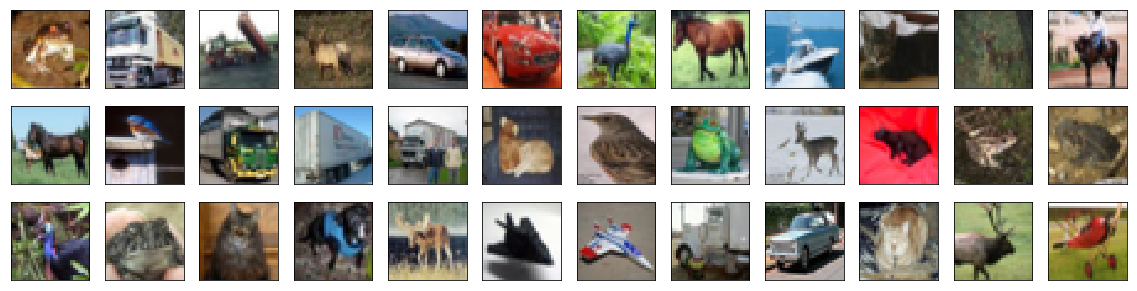

In [14]:
# let's train the first 24 images 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [15]:
# Rescale Images 
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [16]:
# load the weights that yielded the best validation accuracy
model.load_weights('saved_models/keras_cifar10_trained_model.h5')

In [17]:
# Let's evluate the model accuracy, 
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7832


In [18]:
#Visualize some predictions
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

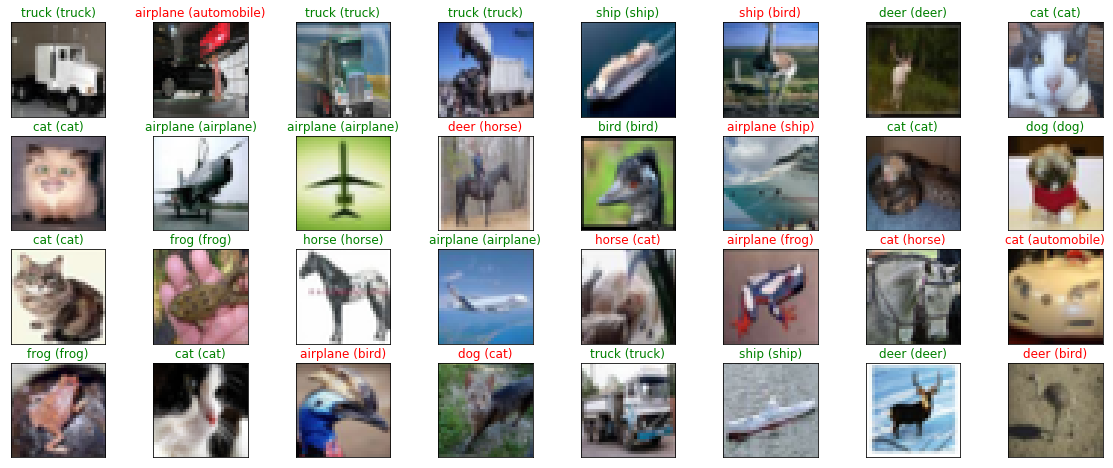

In [19]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

## Little more insight on how to read and infer predictions 

In [21]:
y_hat.shape

(10000, 10)

In [22]:
y_hat[0]

array([ 0.00420754,  0.00294697,  0.00333283,  0.82653958,  0.00108719,
        0.09359273,  0.02965057,  0.00391202,  0.02779546,  0.00693525], dtype=float32)

In [23]:
y_test[0]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [24]:
cifar10_labels[np.argmax(y_hat[0])]

'cat'

In [25]:
cifar10_labels[np.argmax(y_test[0])]

'cat'

In [26]:
x_test[0]

array([[[ 0.61960787,  0.43921569,  0.19215687],
        [ 0.62352943,  0.43529412,  0.18431373],
        [ 0.64705884,  0.45490196,  0.2       ],
        ..., 
        [ 0.53725493,  0.37254903,  0.14117648],
        [ 0.49411765,  0.35686275,  0.14117648],
        [ 0.45490196,  0.33333334,  0.12941177]],

       [[ 0.59607846,  0.43921569,  0.2       ],
        [ 0.59215689,  0.43137255,  0.15686275],
        [ 0.62352943,  0.44705883,  0.17647059],
        ..., 
        [ 0.53333336,  0.37254903,  0.12156863],
        [ 0.49019608,  0.35686275,  0.1254902 ],
        [ 0.46666667,  0.34509805,  0.13333334]],

       [[ 0.59215689,  0.43137255,  0.18431373],
        [ 0.59215689,  0.42745098,  0.12941177],
        [ 0.61960787,  0.43529412,  0.14117648],
        ..., 
        [ 0.54509807,  0.38431373,  0.13333334],
        [ 0.50980395,  0.37254903,  0.13333334],
        [ 0.47058824,  0.34901962,  0.12941177]],

       ..., 
       [[ 0.26666668,  0.48627451,  0.69411767],
        

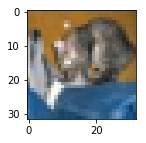

In [39]:
fig = plt.figure(figsize=(2, 2))
plt.imshow(x_test[0])


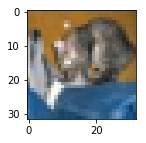

In [40]:
fig = plt.figure(figsize=(2, 2))
plt.imshow(np.squeeze(x_test[0]))

# Data Augmentation 

Object detection in images can some times be tricky, there could be same object but with variations like presented at different angle or have translation like different facial expression. The best example could be if we are detecting road sings for autonomous car, example Stop Sign, cars come in different shapes n sizes, even though we try to mount camera at center point, angle at which camera will see the same stop sign will be very different, make it worse, if we have multiple lanes, distance can impact angle and vsibility conditions could add to the translation issues.

These variations can possibly impact accuracy of the classifier, there is neat little trick, we can possibly create augmented data applying image processing techniques and these augmentations can help classifier learn different variances.

Few very popular variances could **Rotation and Translation**

To achive **Rotation Invariance and Translation Invariance** in above model we used ImageDataGenerator, this utility in real-time randomly transformed the data samples. CNN natively has some sort of invariance properties, as once it discover object, it can easily identify that in any section of the image, to make it even more robust random samples produced by this augmentation utility can help better accuracy score.

Let's look at some examples of how it transformed the data..

In [42]:
# Create and Configure Augmented Image Generator

from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)

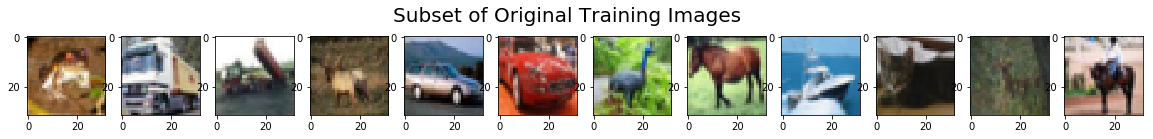

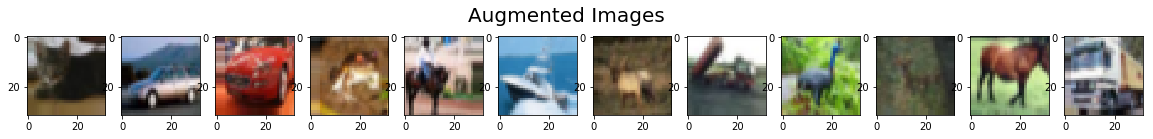

In [44]:
# Visualize Original and Augmented Images

import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

### As we can see above every run of last cell produce some new random results ..and these act as new augmented samples for training the model for better accuracy 

** Optional Resources **

Read this [great blog post](http://machinelearningmastery.com/image-augmentation-deep-learning-keras/) that visualizes augmentations of the MNIST dataset.

Check out this [detailed implementation](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html) that uses augmentation to boost performance on a Kaggle dataset.

Read the Keras [documentation](https://keras.io/preprocessing/image/) on the ImageDataGenerator class.

# ImageNet

Massive dataset of over 10 million hand labeled images for over 100 categories.

Since 2010 ImageNet run yearly Large Scale Visual Competition achieveing better accuracy on object detection.

** First Breaktrough was in 2012 - AlexNeT (Toronto) (Spotlight of Relu and Dropout)**

** 2014 - VGG (Oxford) VGG16/VGG19 (Spotlight 3x3 Conv) **

** 2015 - Microsoft ResNet (Spotlight Massive Deep Arch, highly prone to vanishing gradient, avoided using skip-layer architetcure **

Most of these networks can be easily incorporated in Keras natively.. 

** Optional Resources **

* Check out the [AlexNet](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) paper!

* Read more about [VGGNet](https://arxiv.org/pdf/1409.1556.pdf) here.
    ( The [ResNet](https://arxiv.org/pdf/1512.03385v1.pdf) paper can be found here.

* Here's the [Keras documentation](https://keras.io/applications/) for accessing some famous CNN architectures.

* Read this [detailed treatment](http://neuralnetworksanddeeplearning.com/chap5.html) of the vanishing gradients problem.

* Here's a GitHub [repository](https://github.com/jcjohnson/cnn-benchmarks) containing benchmarks for different CNN architectures.

* Visit the [ImageNet Large Scale Visual Recognition Competition (ILSVRC)](http://www.image-net.org/challenges/LSVRC/) website.




# If you would like to know more about interpreting CNNs and convolutional layers in particular, you are encouraged to check out these resources:

* Here's a [section](http://cs231n.github.io/understanding-cnn/) from the Stanford's CS231n course on visualizing what CNNs learn.

* Check out this [demonstration](https://aiexperiments.withgoogle.com/what-neural-nets-see) of a cool OpenFrameworks app that visualizes CNNs in real-time, from user-supplied video!

* Here's a [demonstration](https://www.youtube.com/watch?v=AgkfIQ4IGaM&t=78s) of another visualization tool for CNNs. If you'd like to learn more about how these visualizations are made, check out this video.

* Here's another [visualization tool](https://medium.com/merantix/picasso-a-free-open-source-visualizer-for-cnns-d8ed3a35cfc5) that seamlessly works with CNNs in Keras and Tensorflow.

* Read this [Keras blog post](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html) on visualizing how CNNs see the world. In this post, you can find an accessible introduction to Deep Dreams, along with code for writing your own deep dreams in Keras. When you've read that:

    * Also check out this [music video](https://www.youtube.com/watch?v=XatXy6ZhKZw) that makes use of Deep Dreams (look at 3:15-3:40)!
    
    * Create your own Deep Dreams (without writing any code!) using this [website](https://deepdreamgenerator.com/).
    
* If you'd like to read more about interpretability of CNNs,

    * here's an [article](https://blog.openai.com/adversarial-example-research/) that details some dangers from using deep learning models (that are not yet interpretable) in real-world applications.
    
    * there's a lot of active research in this area. [These authors](https://arxiv.org/abs/1611.03530) recently made a step in the right direction.


# Study Deep Dreams later --  

# Transfer Learning

![CNN](images/cnn51.png)
![CNN](images/cnn52.png)
![CNN](images/cnn53.png)
![CNN](images/cnn54.png)
![CNN](images/cnn55.png)
![CNN](images/cnn56.png)
![CNN](images/cnn57.png)
![CNN](images/cnn58.png)
![CNN](images/cnn59.png)
![CNN](images/cnn60.png)
![CNN](images/cnn61.png)

** Optional Resources **

* Check out this [research](https://arxiv.org/pdf/1411.1792.pdf) paper that systematically analyzes the transferability of features learned in pre-trained CNNs.

* Read the [Nature publication](http://www.nature.com/articles/nature21056.epdf?referrer_access_token=_snzJ5POVSgpHutcNN4lEtRgN0jAjWel9jnR3ZoTv0NXpMHRAJy8Qn10ys2O4tuP9jVts1q2g1KBbk3Pd3AelZ36FalmvJLxw1ypYW0UxU7iShiMp86DmQ5Sh3wOBhXDm9idRXzicpVoBBhnUsXHzVUdYCPiVV0Slqf-Q25Ntb1SX_HAv3aFVSRgPbogozIHYQE3zSkyIghcAppAjrIkw1HtSwMvZ1PXrt6fVYXt-dvwXKEtdCN8qEHg0vbfl4_m&tracking_referrer=edition.cnn.com) detailing Sebastian Thrun's cancer-detecting CNN!

## Let's do Lab at this location:
https://github.com/anshoomehra/aind2-cnn/tree/master/transfer-learning

transfer_learning.ipynb

** Optional Resources **

* Here's the [first research paper](http://cnnlocalization.csail.mit.edu/Zhou_Learning_Deep_Features_CVPR_2016_paper.pdf) to propose GAP layers for object localization.

* Check out this [repository](https://github.com/alexisbcook/ResNetCAM-keras) that uses a CNN for object localization.

* Watch this [video demonstration](https://www.youtube.com/watch?v=fZvOy0VXWAI) of object localization with a CNN.

* Check out this [repository](https://github.com/alexisbcook/keras_transfer_cifar10) that uses visualization techniques to better understand bottleneck features.

# CNN in Tensorflow: We have practiced enough experimenting in Keras, but there are times we need to do low level coding on Tensorflow, so let's familarize ourself with Tensorflow.

Let's examine how to implement a convolutional layer in TensorFlow.

TensorFlow provides the 

    tf.nn.conv2d(), 
    tf.nn.bias_add(), 
    and tf.nn.relu() 
    
functions to create your own convolutional layers.

    # output depth
    k_output = 64

    # image dimensions
    image_width = 10
    image_height = 10
    color_channels = 3

    # convolution filter dimensions
    filter_size_width = 5
    filter_size_height = 5

    # input/image
    input = tf.placeholder(
    tf.float32,
    shape=[None, image_height, image_width, color_channels])

    # weight and bias
    weight = tf.Variable(tf.truncated_normal(
    [filter_size_height, filter_size_width, color_channels, k_output]))
    bias = tf.Variable(tf.zeros(k_output))

    # apply convolution
    conv_layer = tf.nn.conv2d(input, weight, strides=[1, 2, 2, 1], padding='SAME')
    # add bias
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    # apply activation function
    conv_layer = tf.nn.relu(conv_layer)

The code above uses the tf.nn.conv2d() function to compute the convolution with weight as the filter and [1, 2, 2, 1] for the strides.

* TensorFlow uses a stride for each input dimension, [batch, input_height, input_width, input_channels].
* We generally always set the stride for batch and input_channels (i.e. the first and fourth element in the strides array) to be 1. This ensures that the model uses all batches and input channels. (It's good practice to remove the batches or channels you want to skip from the data set rather than use a stride to skip them.)
* You'll focus on changing input_height and input_width (while setting batch and input_channels to 1). The input_height and input_width strides are for striding the filter over input. This example code uses a stride of 2 with 5x5 filter over input. I've mentioned stride as one number because you usually have a square stride where height = width. When someone says they are using a stride of 2, they usually mean tf.nn.conv2d(x, W, strides=[1, 2, 2, 1]).

The tf.nn.bias_add() function adds a 1-d bias to the last dimension in a matrix. (Note: using tf.add() doesn't work when the tensors aren't the same shape.)


The tf.nn.relu() function applies a ReLU activation function to the layer.

#### Challenge: Set up the strides, padding, filter weight (F_w), and filter bias (F_b) such that the output shape is (1, 2, 2, 3). Note that all of these except strides should be TensorFlow variables.

In [48]:
"""
Setup the strides, padding and filter weight/bias such that
the output shape is (1, 2, 2, 3).
"""
import tensorflow as tf
import numpy as np

# `tf.nn.conv2d` requires the input be 4D (batch_size, height, width, depth)
# (1, 4, 4, 1)
x = np.array([
    [0, 1, 0.5, 10],
    [2, 2.5, 1, -8],
    [4, 0, 5, 6],
    [15, 1, 2, 3]], dtype=np.float32).reshape((1, 4, 4, 1))
X = tf.constant(x)


def conv2d(input):
    # Filter (weights and bias)
    # The shape of the filter weight is (height, width, input_depth, output_depth)
    # The shape of the filter bias is (output_depth,)
    # TODO: Define the filter weights `F_W` and filter bias `F_b`.
    # NOTE: Remember to wrap them in `tf.Variable`, they are trainable parameters after all.
    F_W = tf.Variable(tf.truncated_normal([4, 4, 1, 3]))
    F_b = tf.Variable(tf.zeros(3))
    # TODO: Set the stride for each dimension (batch_size, height, width, depth)
    strides = [1, 2, 2, 1]
    # TODO: set the padding, either 'VALID' or 'SAME'.
    padding = 'SAME'
    # https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#conv2d
    # `tf.nn.conv2d` does not include the bias computation so we have to add it ourselves after.
    return tf.nn.conv2d(input, F_W, strides, padding) + F_b

out = conv2d(X)
print (out)

Tensor("add_1:0", shape=(1, 2, 2, 3), dtype=float32)


#### Alternatively, we can achieve the same via different padding .. 

![CNN](images/cnn62.png)

In [49]:
def conv2d(input):
    # create the filter (weights and bias)
    F_W = tf.Variable(tf.truncated_normal((2, 2, 1, 3)))
    F_b = tf.Variable(tf.zeros(3))
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    x = tf.nn.conv2d(input, F_W, strides, padding)
    return tf.nn.bias_add(x, F_b)

out = conv2d(X)
print (out)

Tensor("BiasAdd:0", shape=(1, 2, 2, 3), dtype=float32)


## Max Pooling in Tensorflow

![CNN](images/cnn63.png)

### Challenge: Setup the strides, padding and ksize such that the output shape after pooling is (1, 2, 2, 1).

In [50]:
"""
Set the values to `strides` and `ksize` such that
the output shape after pooling is (1, 2, 2, 1).
"""
import tensorflow as tf
import numpy as np

# `tf.nn.max_pool` requires the input be 4D (batch_size, height, width, depth)
# (1, 4, 4, 1)
x = np.array([
    [0, 1, 0.5, 10],
    [2, 2.5, 1, -8],
    [4, 0, 5, 6],
    [15, 1, 2, 3]], dtype=np.float32).reshape((1, 4, 4, 1))
X = tf.constant(x)

def maxpool(input):
    # TODO: Set the ksize (filter size) for each dimension (batch_size, height, width, depth)
    ksize = [1, 2, 2, 1]
    # TODO: Set the stride for each dimension (batch_size, height, width, depth)
    strides = [1, 2, 2, 1]
    # TODO: set the padding, either 'VALID' or 'SAME'.
    padding = 'SAME'
    # https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#max_pool
    return tf.nn.max_pool(input, ksize, strides, padding)
    
out = maxpool(X)

print (out)

Tensor("MaxPool:0", shape=(1, 2, 2, 1), dtype=float32)


![CNN](images/cnn64.png)

# Let's do one full CNN in Tensorflow using MNIST database

![CNN](images/cnn65.png)
![CNN](images/cnn66.png)
![CNN](images/cnn67.png)
![CNN](images/cnn68.png)


In [51]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

import tensorflow as tf

# Parameters
learning_rate = 0.00001
epochs = 1
batch_size = 128

# Number of samples to calculate validation and accuracy
# Decrease this if you're running out of memory to calculate accuracy
test_valid_size = 256

# Network Parameters
n_classes = 10  # MNIST total classes (0-9 digits)
dropout = 0.75  # Dropout, probability to keep units


# Store layers weight & bias
weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out': tf.Variable(tf.random_normal([1024, n_classes]))}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))}


def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

def conv_net(x, weights, biases, dropout):
    # Layer 1 - 28*28*1 to 14*14*32
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)

    # Layer 2 - 14*14*32 to 7*7*64
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer - 7*7*64 to 1024
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output Layer - class prediction - 1024 to 10
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

# tf Graph input
x = tf.placeholder(tf.float32, [None, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

# Model
logits = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        for batch in range(mnist.train.num_examples//batch_size):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})

            # Calculate batch loss and accuracy
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
            valid_acc = sess.run(accuracy, feed_dict={
                x: mnist.validation.images[:test_valid_size],
                y: mnist.validation.labels[:test_valid_size],
                keep_prob: 1.})

            print('Epoch {:>2}, Batch {:>3} - Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
                epoch + 1,
                batch + 1,
                loss,
                valid_acc))

    # Calculate Test Accuracy
    test_acc = sess.run(accuracy, feed_dict={
        x: mnist.test.images[:test_valid_size],
        y: mnist.test.labels[:test_valid_size],
        keep_prob: 1.})
    print('Testing Accuracy: {}'.format(test_acc))

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
Epoch  1, Batch   1 - Loss: 71292.2422 Validation Accuracy: 0.070312
Epoch  1, Batch   2 - Loss: 54211.7734 Validation Accuracy: 0.097656
Epoch  1, Batch   3 - Loss: 55370.5898 Validation Accuracy: 0.113281
Epoch  1, Batch   4 - Loss: 56839.3555 Validation Accuracy: 0.109375
Epoch  1, Batch   5 - Loss: 41351.3828 Validation Accuracy: 0.117188
Epoch  1, Batch   6 - Loss: 35510.2461 Validation Accuracy: 0.125000
Epoch  1, Batch   7 - Loss: 30502.7480 Validation Accuracy: 0.128906
Epoch  1, Batch   8 - Loss: 26855.7891 Validation Accuracy: 0.136719
Epoch  1, Batch   9 - Loss: 31133.2852 Validation Accuracy: 0.136719
Epoch  1, Batch  10 - Loss: 27917.4766 Validation Accuracy: 0.117188
Epoch  1, Batch  11 - Loss: 25139.5566 Validation Accuracy: 0.113281
Epoch  1, Batch  12 - Loss: 24894.5938 Validation Accuracy: 0.128906
Epoch  1, Batc

Epoch  1, Batch 118 - Loss:  4295.2246 Validation Accuracy: 0.601562
Epoch  1, Batch 119 - Loss:  4989.6279 Validation Accuracy: 0.593750
Epoch  1, Batch 120 - Loss:  4981.5317 Validation Accuracy: 0.589844
Epoch  1, Batch 121 - Loss:  5029.5898 Validation Accuracy: 0.597656
Epoch  1, Batch 122 - Loss:  4794.1255 Validation Accuracy: 0.597656
Epoch  1, Batch 123 - Loss:  4434.3643 Validation Accuracy: 0.601562
Epoch  1, Batch 124 - Loss:  3216.5259 Validation Accuracy: 0.605469
Epoch  1, Batch 125 - Loss:  4550.3721 Validation Accuracy: 0.605469
Epoch  1, Batch 126 - Loss:  3792.5703 Validation Accuracy: 0.605469
Epoch  1, Batch 127 - Loss:  5338.8857 Validation Accuracy: 0.605469
Epoch  1, Batch 128 - Loss:  4236.4629 Validation Accuracy: 0.613281
Epoch  1, Batch 129 - Loss:  4579.0400 Validation Accuracy: 0.617188
Epoch  1, Batch 130 - Loss:  4474.5581 Validation Accuracy: 0.625000
Epoch  1, Batch 131 - Loss:  4833.5356 Validation Accuracy: 0.613281
Epoch  1, Batch 132 - Loss:  5384.

Epoch  1, Batch 237 - Loss:  1210.2704 Validation Accuracy: 0.722656
Epoch  1, Batch 238 - Loss:  3669.1550 Validation Accuracy: 0.714844
Epoch  1, Batch 239 - Loss:  2286.3174 Validation Accuracy: 0.714844
Epoch  1, Batch 240 - Loss:  2402.7063 Validation Accuracy: 0.714844
Epoch  1, Batch 241 - Loss:  2831.1675 Validation Accuracy: 0.710938
Epoch  1, Batch 242 - Loss:  2662.1643 Validation Accuracy: 0.703125
Epoch  1, Batch 243 - Loss:  2267.5977 Validation Accuracy: 0.710938
Epoch  1, Batch 244 - Loss:  2062.6130 Validation Accuracy: 0.710938
Epoch  1, Batch 245 - Loss:  1683.8975 Validation Accuracy: 0.714844
Epoch  1, Batch 246 - Loss:  2319.0830 Validation Accuracy: 0.707031
Epoch  1, Batch 247 - Loss:  2951.8755 Validation Accuracy: 0.714844
Epoch  1, Batch 248 - Loss:  2000.3630 Validation Accuracy: 0.714844
Epoch  1, Batch 249 - Loss:  2499.1685 Validation Accuracy: 0.710938
Epoch  1, Batch 250 - Loss:  2912.3018 Validation Accuracy: 0.714844
Epoch  1, Batch 251 - Loss:  2664.

Epoch  1, Batch 356 - Loss:  1777.1018 Validation Accuracy: 0.753906
Epoch  1, Batch 357 - Loss:  1444.4956 Validation Accuracy: 0.753906
Epoch  1, Batch 358 - Loss:  2078.2815 Validation Accuracy: 0.765625
Epoch  1, Batch 359 - Loss:  2426.3418 Validation Accuracy: 0.761719
Epoch  1, Batch 360 - Loss:  1611.6057 Validation Accuracy: 0.753906
Epoch  1, Batch 361 - Loss:  1949.5497 Validation Accuracy: 0.757812
Epoch  1, Batch 362 - Loss:  1945.3142 Validation Accuracy: 0.750000
Epoch  1, Batch 363 - Loss:  1701.6257 Validation Accuracy: 0.753906
Epoch  1, Batch 364 - Loss:  1503.2528 Validation Accuracy: 0.753906
Epoch  1, Batch 365 - Loss:  1606.3799 Validation Accuracy: 0.761719
Epoch  1, Batch 366 - Loss:  1623.8436 Validation Accuracy: 0.765625
Epoch  1, Batch 367 - Loss:  1261.9358 Validation Accuracy: 0.753906
Epoch  1, Batch 368 - Loss:  1920.6403 Validation Accuracy: 0.753906
Epoch  1, Batch 369 - Loss:  1627.7600 Validation Accuracy: 0.761719
Epoch  1, Batch 370 - Loss:  1577.

** Additional Resources **

There are many wonderful free resources that allow you to go into more depth around Convolutional Neural Networks. In this course, our goal is to give you just enough intuition to start applying this concept on real world problems so you have enough of an exposure to explore more on your own. We strongly encourage you to explore some of these resources more to reinforce your intuition and explore different ideas.

These are the resources we recommend in particular:

* Andrej Karpathy's [CS231n Stanford](http://cs231n.github.io/) course on Convolutional Neural Networks.
Michael Nielsen's [free book](free book) on Deep Learning.
Goodfellow, Bengio, and Courville's more advanced [free book](http://deeplearningbook.org/) on Deep Learning.

# Weight Initialization Techniques

This notebook has grown too large, let's work on pre-defined notebooks going foward .. 

https://github.com/anshoomehra/udacity-deep-learning/tree/master/weight-initialization


** Additional Material **

New techniques for dealing with weights are discovered every few years. We've provided the most popular papers in this field over the years.

* [Understanding the difficulty of training deep feedforward neural networks](http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf)

* [Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification](https://arxiv.org/pdf/1502.01852v1.pdf)

* [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167v2.pdf)

# Autoencoders ..

In summary, they are used for compression, where Encoder compress input to smaller size, Decoder on other hand can read encoded input to convert it back to original Input ..

In practice though, compression is not as great as avaiable compressions like jpg etc, however, it found good use in ** De-Noising & Dimensionality Reduction **


Labs and Explanation 

https://github.com/anshoomehra/udacity-deep-learning/tree/master/autoencoder

# Transfer Learning with Tensorflow

We saw this earlier already, but let's try this with Tensorflow low level ..

Lab at location: https://github.com/anshoomehra/udacity-deep-learning/tree/master/transfer-learning